<img src="ost_logo.png" width="240" height="240" align="right"/>
<div style="text-align: left"> <b> Machine Learning </b> <br> MSE FTP MachLe <br> 
<a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> </div>

# Simple Gaussian Process
MSE FTP_MachLe HS2020
Christoph Würsch, Institute for Computational Engineering ICE, OST

__A Gaussian process is a stochastic process such that any finite subcollection of random variables has a multivariate Gaussian distribution.__ In particular, a collection of random variables $\left\lbrace f(x) : x \in \mathcal{X} \right\rbrace$  is said to be drawn from a Gaussian process $\mathcal{GP}$ with mean function $m(·)$ and covariance function $k(·, ·)$ if for any finite set of elements $x_1, . . . , x_m \in \mathcal{X}$, the associated finite set of random variables $f(x_1), \dots, f(x_m)$ have distribution,



When we form a Gaussian process $\mathcal{GP}$ we assume data is *jointly Gaussian* with a particular mean and covariance,

$$
p(\mathbf{f}|\mathbf{X}) \sim \mathcal{N}(\mathbf{m}(\mathbf{X}), \mathbf{K}(\mathbf{X})),
$$

$$
\mathbf{f}  \sim \mathcal{GP}(\mathbf{m}(\mathbf{x}), \mathbf{k}(\mathbf{x,x'})),
$$

where the conditioning is on the inputs $\mathbf{X}$ which are used for computing the mean and covariance. For this reason they are known as mean and covariance functions. To make things clearer, let us assume, that the mean function $\mathbf{m}(\mathbf{X})$ is zero, i.e. the jointly Gaussian distribution is centered around zero.

Generate random $x$-values:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix as dm
import matplotlib
from collections import OrderedDict

cmaps = OrderedDict()
cmaps['Sequential'] = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 
                        'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps['Diverging'] = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
                      'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']


#%% Sample a function from a Gaussian Process (GP) 
N=300;
X = np.linspace(-5, 5, N).reshape(N,1) ;

Calculate the **distance matrix** $D$ :

$
\begin{equation}
D_{ij}=\sqrt[p]{\left \vert x_i-x_j \right \vert ^p} 
\end{equation} $

In [2]:
#calculate the distance matrix
D=dm(X,X,p=0.5)
print(D)

[[ 0.          0.03344482  0.06688963 ...  9.93311037  9.96655518
  10.        ]
 [ 0.03344482  0.          0.03344482 ...  9.89966555  9.93311037
   9.96655518]
 [ 0.06688963  0.03344482  0.         ...  9.86622074  9.89966555
   9.93311037]
 ...
 [ 9.93311037  9.89966555  9.86622074 ...  0.          0.03344482
   0.06688963]
 [ 9.96655518  9.93311037  9.89966555 ...  0.03344482  0.
   0.03344482]
 [10.          9.96655518  9.93311037 ...  0.06688963  0.03344482
   0.        ]]


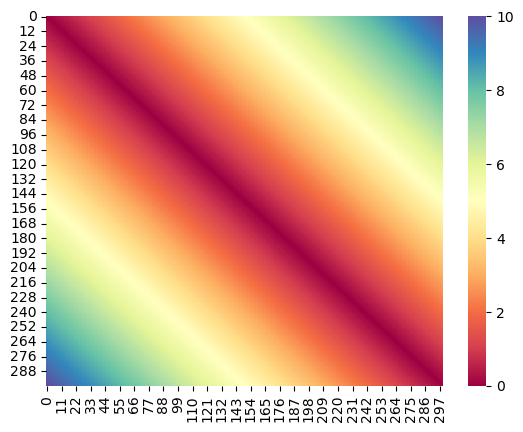

In [3]:
import seaborn as sns
sns.heatmap(D, cmap=cmaps['Diverging'][8]);

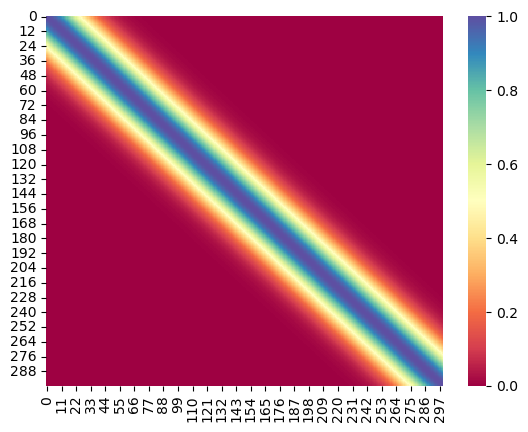

In [4]:
sns.heatmap(np.exp(-D**2), cmap=cmaps['Diverging'][8]);

Calculate the mean vector $\vec{m}$ and the covariance matrix $K_{ij}=d_{ij}^p$ 

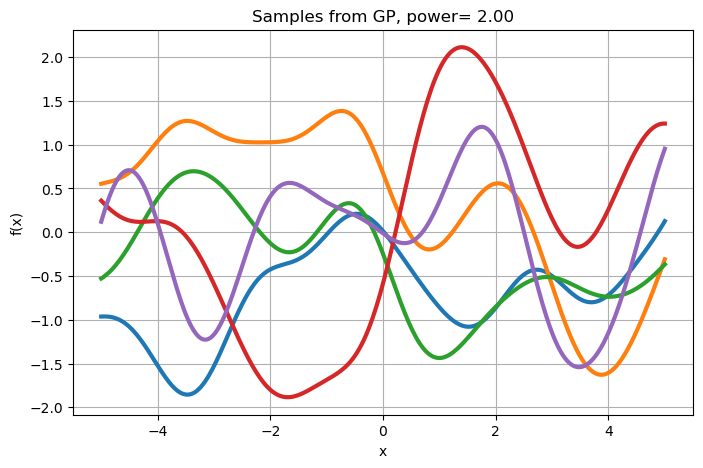

In [9]:
power=2;

mean =np.zeros(N)
cov  =np.exp(-1/2*np.power(D,power))
y=np.random.multivariate_normal(mean, cov, 5).T

fig1=plt.figure(figsize=(8,5))
plt.plot(X,y,lw=3); plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')
plt.title('Samples from GP, power= %1.2f' % float(power))
plt.savefig('SamplesGP %1.2f.png' % float(power),dpi= 600)